In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import csv
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.utils import to_categorical
import sklearn
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler


# Read CSV file for Training the model using Pandas
df_train = pd.read_csv("totol_CV_2fps.csv", header=0)
df_train2 = pd.read_csv("outputtotal2_3fps.csv", header=0)
df_train3 = pd.read_csv("FPS4_0104_vec_C.csv", header=0)
# Read CSV file for Validation or Testing the Model using Pandas
df_test = pd.read_csv("fps_Vec_1220_test.csv", header=0)
# df_test2 = pd.read_csv("output5test.csv", header=0)
# df_test2 = df_test2.iloc[:,1:]
# df_test = pd.concat([df_test, df_test2], axis = 1)

df_train = pd.concat([df_train, df_train2, df_train3], ignore_index=True)

In [2]:
df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)
df_test

,class,thumb_CmcX,thumb_CmcY,thumb_CmcZ,thumb_McpX,thumb_McpY,thumb_McpZ,thumb_IpX,thumb_IpY,thumb_IpZ,...,pinky_McpZ,pinky_PipX,pinky_PipY,pinky_PipZ,pinky_DipX,pinky_DipY,pinky_DipZ,pinky_TipX,pinky_TipY,pinky_TipZ
536,3,-0.090626,0.037812,-0.078240,-0.071243,0.071147,-0.054067,-0.019528,0.083481,-0.034997,...,-0.082101,-0.032140,0.080200,-0.031614,-0.029167,0.053254,-0.008006,-0.028277,0.031687,-0.003401
465,4,-0.054763,-0.051921,-0.086791,-0.051366,-0.023837,-0.074225,-0.024701,0.031971,-0.059659,...,-0.159268,-0.096734,0.078355,-0.041301,-0.057642,0.017990,0.013704,-0.024019,0.000423,0.018500
129,1,-0.116947,0.111044,0.147915,-0.052679,0.103933,0.028737,-0.010302,0.087559,0.008052,...,-0.205361,0.017193,0.141904,0.034898,0.012585,-0.017250,0.070986,-0.002553,-0.049335,0.048548
567,3,0.061965,-0.078872,-0.159534,0.119446,-0.044869,-0.081767,0.150429,0.048133,-0.063794,...,-0.052557,0.104960,0.026131,-0.083586,0.008854,0.052333,-0.059389,-0.043955,0.037426,-0.034717
278,2,-0.011457,0.103192,-0.114737,0.051854,0.083922,-0.053026,0.088247,0.062441,-0.020705,...,-0.028439,0.060403,0.103046,-0.033296,-0.005324,0.070680,-0.007677,-0.017383,0.054210,0.001241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,2,0.040972,0.092561,-0.122424,0.094557,0.038629,-0.061291,0.112231,0.003251,-0.028153,...,-0.038745,0.100103,0.066120,-0.033620,0.038465,0.055930,-0.004818,0.021370,0.048481,0.004343
123,1,-0.131850,0.060192,0.014668,-0.110239,0.122708,-0.021700,-0.045708,0.139837,-0.026925,...,-0.139088,-0.024655,0.149112,-0.028334,0.023939,-0.028376,0.019167,0.006859,-0.051956,0.016718
549,3,-0.099770,-0.037851,-0.101171,-0.096824,0.021635,-0.088285,-0.060254,0.057471,-0.064494,...,-0.217222,-0.095975,0.062871,-0.046609,-0.048956,-0.000263,-0.006142,-0.024019,-0.004762,-0.008749
334,2,-0.000269,0.074084,-0.210623,0.060410,0.039090,-0.108739,0.110928,0.024429,-0.058626,...,-0.089805,0.079993,0.093529,-0.067291,0.011913,0.082723,-0.034154,-0.004027,0.067878,-0.020995


In [3]:
# Put Categorical using Pandas
df_train["class"] = pd.Categorical(df_train["class"])
df_test["class"] = pd.Categorical(df_test["class"])

# Copy Label and Feature for training
y_train = df_train.pop("class")
x_train = df_train.copy()

y_test = df_test.pop("class")
x_test = df_test.copy()

In [4]:
# Copied Features turn to Array by using NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)
# transformerTrain = MaxAbsScaler().fit(x_train)
# transformerTrain.transform(x_train)
# transformerTest = MaxAbsScaler().fit(x_test)
# transformerTest.transform(x_test)

In [5]:
# Since the array shape is 1x1, we must turn it into 1x10x1 so we can feed it into the model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] , 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] , 1))
# Number of classes according standard Indonesian Language Alphabets
num_classes = 5
# Using the Keras.Utils to put the label categorically 
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [6]:
print(x_train.shape,
x_test.shape,
y_train.shape,
y_test.shape)

(31522, 123, 1) (704, 60, 1) (31522, 5) (704, 5)


In [7]:
print(x_train.shape)
x_train

(31522, 123, 1)


array([[[ 0.02121472],
        [-0.10858938],
        [-0.13115148],
        ...,
        [ 0.22838047],
        [ 0.60922086],
        [-0.07339105]],

       [[ 0.10372651],
        [-0.03456229],
        [-0.06673892],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[ 0.05437434],
        [ 0.06524152],
        [-0.16349111],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       ...,

       [[ 0.05497894],
        [-0.05401897],
        [-0.09179972],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[ 0.03695926],
        [-0.1128062 ],
        [-0.08771974],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[ 0.10620165],
        [-0.08905351],
        [-0.09531666],
        ...,
        [ 0.6038596 ],
        [ 0.88581932],
        [ 0.03152992]]])

In [8]:
# One Dimensional Convolutional Neural Network model, Train will be feed to 1 Dimension Convolutional Neural Network
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding="causal", activation="relu", input_shape=x_train.shape[1:3]),
    tf.keras.layers.Conv1D(filters=32, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=128, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.Conv1D(filters=256, kernel_size=7, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.5),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax')])
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M2


2023-01-05 16:43:47.392626: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-05 16:43:47.393104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 123, 32)           256       
                                                                 
 conv1d_1 (Conv1D)           (None, 123, 32)           7200      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 61, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 61, 64)            14400     
                                                                 
 conv1d_3 (Conv1D)           (None, 61, 64)            28736     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 64)           0         
 1D)                                                    

In [9]:
earlystop_callback = EarlyStopping(
  monitor='val_loss', min_delta=0.001,
  patience=10, verbose=1, mode='min', restore_best_weights=True)

In [10]:
#Train the Model
model.fit(x_train, y_train, epochs=100, batch_size=512, callbacks=[earlystop_callback], validation_data=(x_test, y_test))

Epoch 1/100


2023-01-05 16:43:54.072122: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-05 16:43:54.620202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - ETA: 0s - loss: 1.5539 - accuracy: 0.2650

ValueError: in user code:

    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/engine/training.py", line 1499, in test_step
        y_pred = self(x, training=False)
    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/waynewang/miniconda/lib/python3.9/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 123, 1), found shape=(None, 60, 1)


In [10]:
# df_pic = pd.read_csv('output_pic2.csv', encoding='utf-8')
# df_pic = sklearn.utils.shuffle(df_pic)
# label2 = df_pic["class"]
# data2 = df_pic.iloc[:,1:]
# data2n = np.array(data2)
# label2n = np.array(label2)
# label2n  = np_utils.to_categorical(label2n)
# data2n = np.reshape(data2n, (data2n.shape[0], data2n.shape[1]//3, 3))
# print(data2n.shape, label2n.shape)

In [11]:
# model.evaluate(x=data2n, y=label2n, verbose=1)

In [93]:
model.save("model0104vec.h5")

In [13]:
# x_train

In [104]:
y_pred = model.predict(x_test)
y_pred

2023-01-05 15:04:03.233063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 6ms/step


array([[1.2194171e-03, 1.2075614e-06, 3.2129459e-04, 4.4492530e-03,
        9.9400890e-01],
       [9.8405021e-01, 3.2079242e-07, 6.6266007e-06, 2.5847691e-04,
        1.5684389e-02],
       [9.7542920e-04, 9.3618548e-03, 9.0725356e-01, 6.5139748e-02,
        1.7269431e-02],
       ...,
       [2.1919401e-04, 9.9507117e-01, 1.1843396e-03, 3.2797616e-03,
        2.4550740e-04],
       [2.0852285e-03, 4.0775235e-06, 7.8407733e-04, 4.5073882e-02,
        9.5205271e-01],
       [2.5079098e-02, 2.7709629e-04, 1.3189479e-02, 1.5489985e-01,
        8.0655450e-01]], dtype=float32)

In [105]:
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)
y_pred

array([4, 0, 2, 0, 4, 0, 4, 0, 1, 3, 1, 4, 2, 4, 4, 2, 4, 2, 2, 3, 4, 2,
       4, 4, 4, 3, 4, 4, 3, 1, 2, 0, 0, 2, 3, 4, 4, 2, 4, 1, 4, 4, 4, 2,
       3, 3, 2, 2, 1, 3, 2, 3, 2, 2, 3, 4, 1, 4, 2, 4, 3, 4, 2, 4, 4, 4,
       2, 3, 4, 4, 0, 2, 4, 3, 4, 3, 0, 4, 4, 0, 2, 2, 3, 0, 2, 2, 0, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 3, 4, 1, 3, 3, 2, 2, 2, 2, 4, 3, 2,
       4, 4, 1, 4, 1, 4, 3, 3, 0, 2, 4, 3, 3, 2, 3, 1, 3, 3, 2, 3, 2, 4,
       4, 4, 2, 1, 3, 4, 2, 2, 2, 4, 0, 3, 4, 0, 1, 4, 3, 4, 3, 2, 3, 0,
       2, 3, 4, 3, 2, 1, 3, 4, 2, 4, 1, 4, 4, 2, 4, 2, 0, 1, 4, 0, 4, 4,
       3, 4, 2, 4, 4, 4, 2, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 1, 2, 0, 3, 2,
       2, 2, 2, 2, 0, 4, 2, 4, 4, 1, 1, 0, 3, 0, 4, 0, 2, 4, 2, 3, 4, 3,
       4, 2, 3, 2, 4, 4, 2, 1, 1, 3, 2, 4, 1, 3, 4, 2, 4, 0, 3, 2, 1, 2,
       3, 4, 2, 0, 4, 4, 3, 4, 2, 3, 1, 4, 0, 0, 4, 4, 3, 4, 3, 3, 0, 3,
       4, 4, 4, 4, 4, 2, 2, 4, 3, 1, 4, 2, 2, 3, 3, 1, 4, 4, 4, 1, 1, 2,
       3, 0, 4, 0, 1, 4, 4, 1, 4, 1, 2, 4, 3, 4, 4,

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [107]:
y_test
confusion_matrix(y_test, y_pred)

array([[ 60,   0,   1,   1,  25],
       [  1,  73,  12,   0,   3],
       [  0,   1, 145,  14,  14],
       [  1,   0,   2, 122,  42],
       [  8,   1,   9,   2, 167]])

In [108]:
# plot_confusion_matrix(model, x_test, y_test)

In [109]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred

classifier = estimator(model, [0,1,2,3,4])

In [110]:
# plot_confusion_matrix(model, x_test, y_test)

22/22 [==============================] - 0s 4ms/step


/Users/waynewang/miniconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


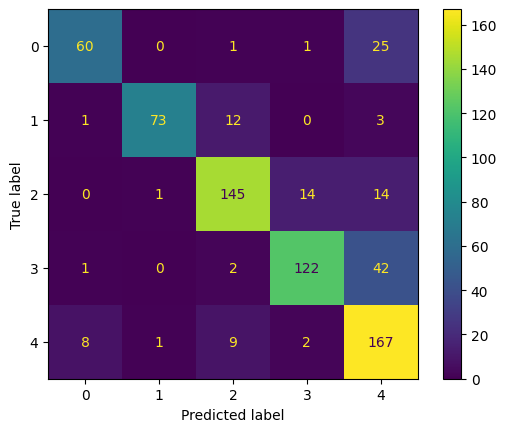

In [111]:
plot_confusion_matrix(estimator=classifier, X = x_test, y_true = y_test)
